<a href="https://colab.research.google.com/github/Pooyaadel/MIS515-Project-1---Project-3/blob/main/mis515project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


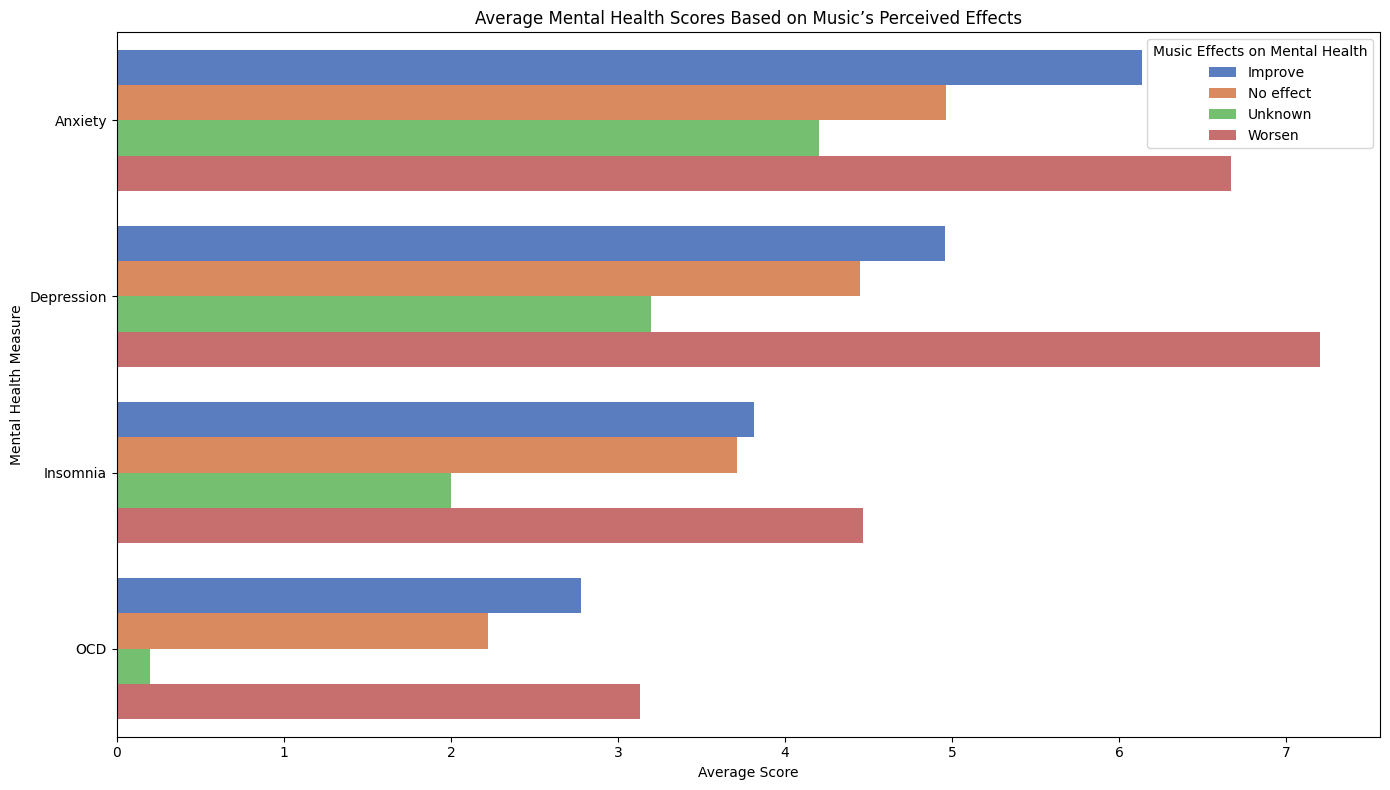

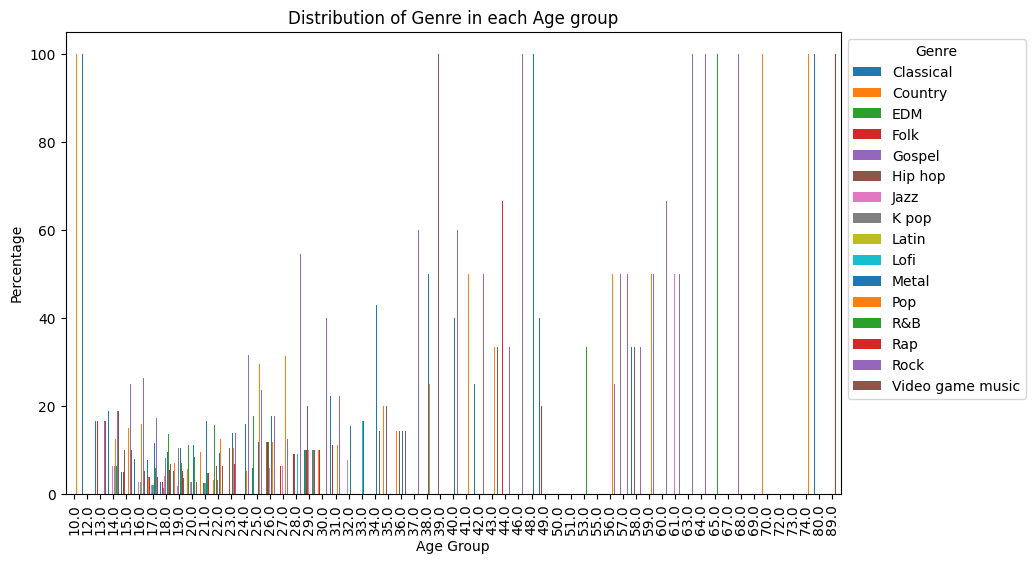

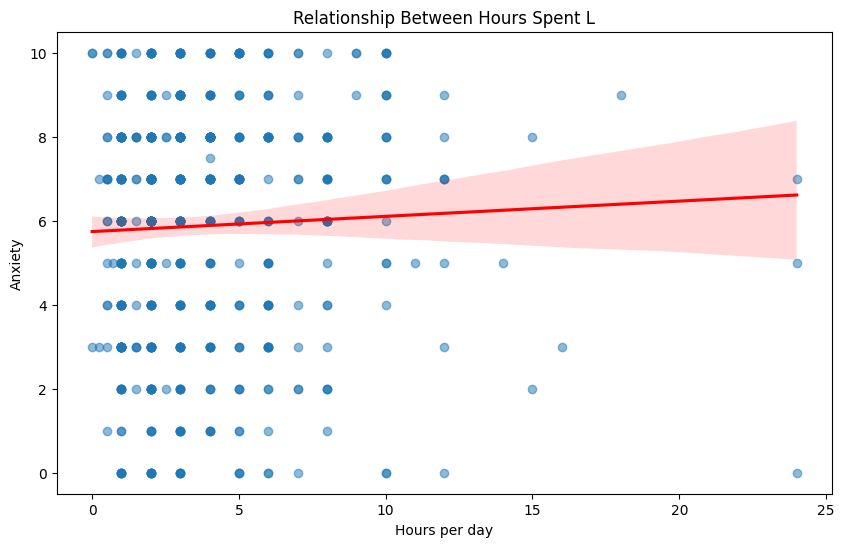

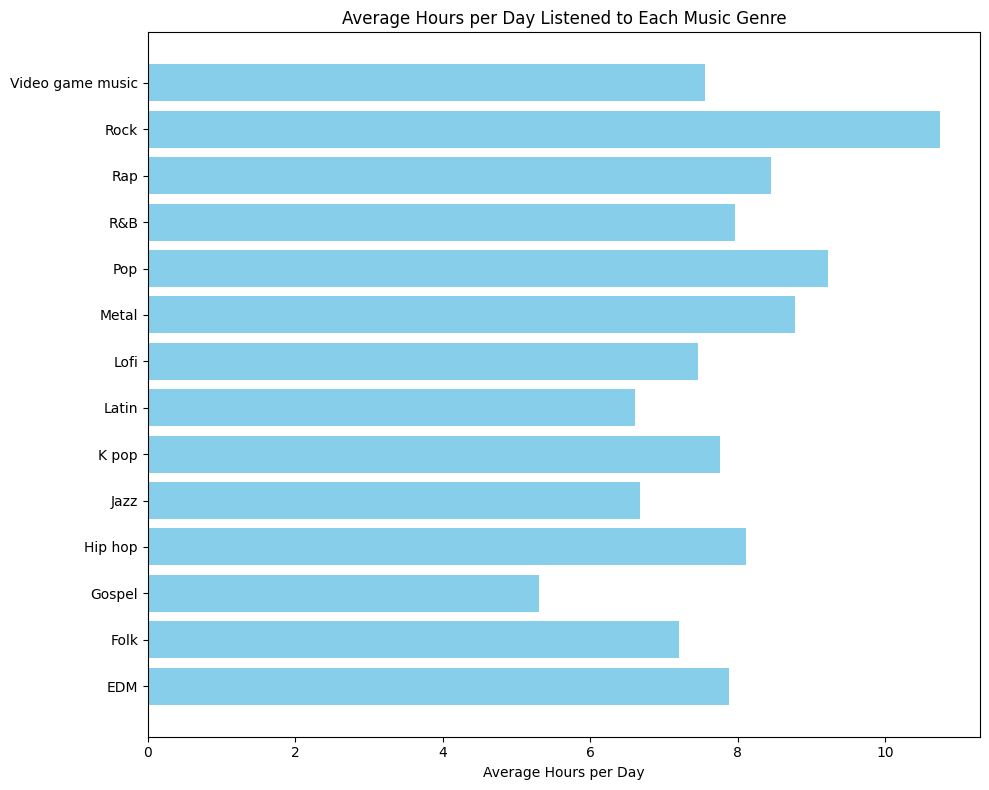

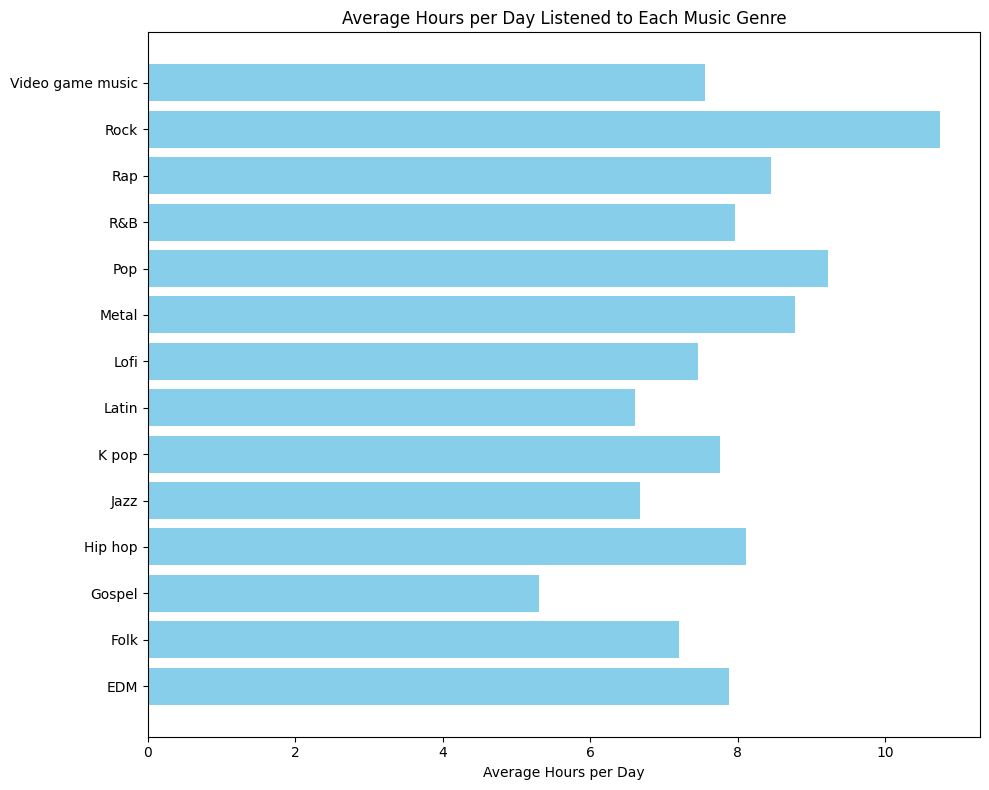

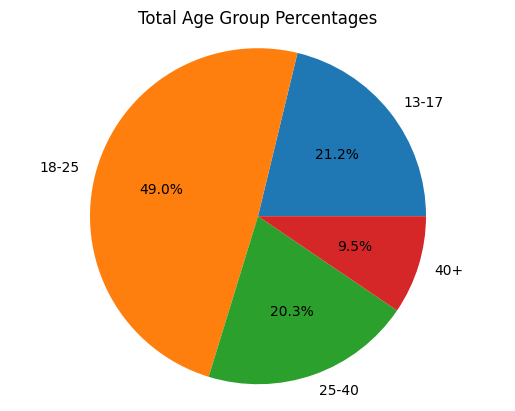

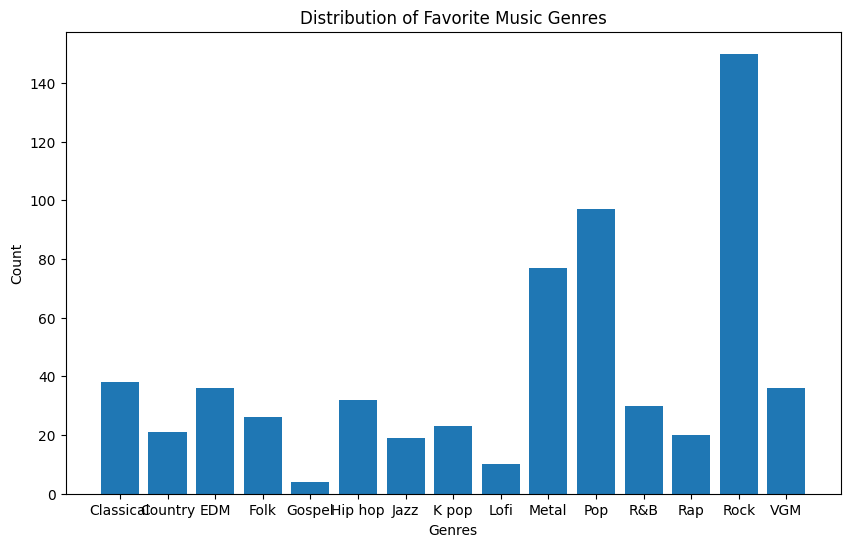

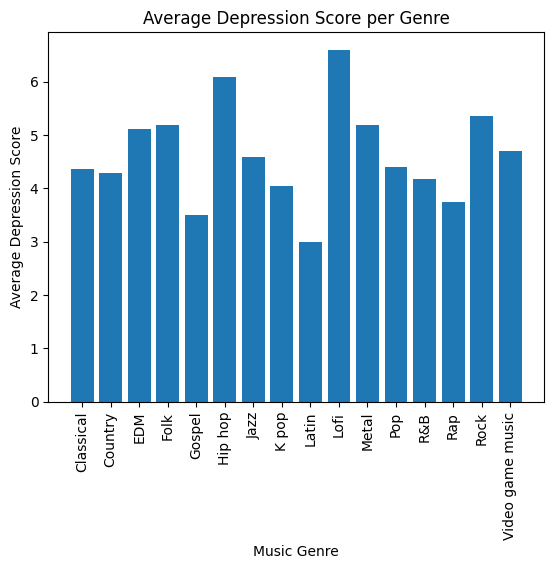

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

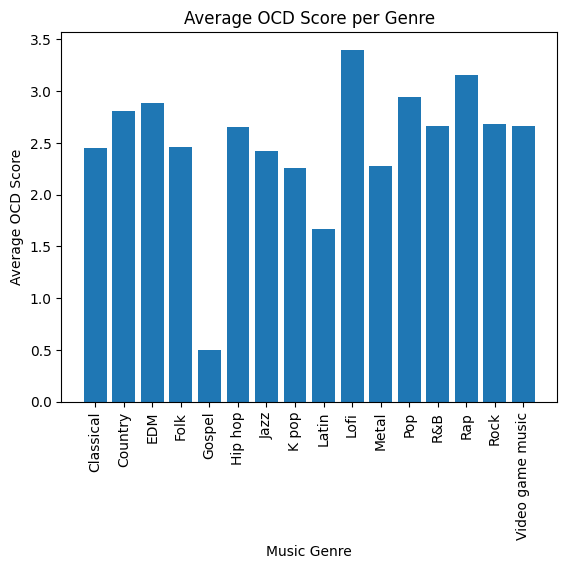

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/mis515pandas/mxmh_survey_results.csv'
#import libraries usd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(file_path)

#Data cleaning process
#Filled null values in 'Music effects' column with Unknown
data['Music effects'].fillna( 'Unknown', inplace=True)

# Filled missing values in 'Primary streaming service' with 'Unknown
data['Primary streaming service'].fillna('Unknown', inplace=True)

#removed permissions column as it did not serve a purpose in our analysis
data.drop('Permissions', axis=1, inplace=True)
data.dropna(inplace=True)

#pooya
#assigned a variable to 4 mental health values
mental_health_measures = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# made a new DF that stores the average of mental health measures based on the effects of music
average_mental_health_by_effect = data.groupby('Music effects')[mental_health_measures].mean()

#code for barplot
plt.figure(figsize=(14, 8))

sns.barplot(x='value', y='variable', hue='Music effects', data=pd.melt(average_mental_health_by_effect.reset_index(), id_vars='Music effects'), palette='muted')
plt.title('Average Mental Health Scores Based on Music’s Perceived Effects')
plt.xlabel('Average Score')
plt.ylabel('Mental Health Measure')
plt.legend(title='Music Effects on Mental Health')
plt.tight_layout() #used this function to adjust the sizing of the plot so it does not overlap


#code for age group vs genre
age_groups = data.groupby('Age')['Fav genre'].value_counts(normalize=True) * 100
age_groups.unstack().plot(kind='bar', stacked=False, figsize=(10,6), width = 0.8)
plt.title('Distribution of Genre in each Age group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1,1))
plt.show()

#aisling
#code for music and anxiety levels
plt.figure(figsize=(10,6))
sns.regplot(x='Hours per day', y='Anxiety', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship Between Hours Spent L')

#elias
eData = {
    'Genre': ['EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music'],
    'Average Hours per Day': [7.88, 7.20, 5.31, 8.11, 6.68, 7.76, 6.61, 7.46, 8.78, 9.22, 7.96, 8.45, 10.75, 7.56]
}

genre_hours_df_sorted = pd.DataFrame(eData)  #convert the data dictionary into a pandas


plt.figure(figsize=(10, 8))  #make a new figure for plotting
plt.barh(genre_hours_df_sorted['Genre'], genre_hours_df_sorted['Average Hours per Day'], color='skyblue')  #make bar chart
plt.xlabel('Average Hours per Day')  #labeling
plt.title('Average Hours per Day Listened to Each Music Genre')  #labeling title
plt.tight_layout()  #automatically adjust parameters

plt.show()  #show plot


#genre_hours_df_sorted = pd.DataFrame(data)  #convert the data dictionary into a pandas


plt.figure(figsize=(10, 8))  #make a new figure for plotting
plt.barh(genre_hours_df_sorted['Genre'], genre_hours_df_sorted['Average Hours per Day'], color='skyblue')  #make bar chart
plt.xlabel('Average Hours per Day')  #labeling
plt.title('Average Hours per Day Listened to Each Music Genre')  #labeling title
plt.tight_layout()  #automatically adjust parameters

plt.show()  #show plot

#jake
#to hold counts of ages

age_ranges = {
    '13-17': 0,
    '18-25': 0,
    '25-40': 0,
    '40+': 0
}
# scans every value in Age column, sorting it into different groups
for x in data["Age"]:
    if 13 <= x <= 17:
      age_ranges['13-17'] += 1
    elif 18 <= x <= 25:
      age_ranges['18-25'] += 1
    elif 26 <= x <= 40:
      age_ranges['25-40'] += 1
    else:
      age_ranges['40+'] += 1

total_ages = sum(age_ranges.values()) # gets total amount of inputs for getting percentage denominator
age_percentages = {key: (value / total_ages) * 100 for key, value in age_ranges.items()}
labels = age_percentages.keys() # labels each pie chart section with age groups
sizes = age_percentages.values() # makes equal sizes
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Total Age Group Percentages')
plt.show()

genres = {
    'Classical': 0,
    'Country': 0,
    'EDM': 0,
    'Folk': 0,
    'Gospel': 0,
    'Hip hop': 0,
    'Jazz': 0,
    'K pop': 0,
    'Lofi': 0,
    'Metal': 0,
    'Pop': 0,
    'R&B': 0,
    'Rap': 0,
    'Rock': 0,
    'VGM': 0

}
# scans every value in Fav genre column, sorting it into different groups
for genre in data['Fav genre']:
    if genre == 'Classical':
        genres['Classical'] += 1
    elif genre == 'Country':
        genres['Country'] += 1
    elif genre == 'EDM':
        genres['EDM'] += 1
    elif genre == 'Folk':
        genres['Folk'] += 1
    elif genre == 'Gospel':
        genres['Gospel'] += 1
    elif genre == 'Hip hop':
        genres['Hip hop'] += 1
    elif genre == 'Jazz':
        genres['Jazz'] += 1
    elif genre == 'K pop':
        genres['K pop'] += 1
    elif genre == 'Lofi':
        genres['Lofi'] += 1
    elif genre == 'Metal':
        genres['Metal'] += 1
    elif genre == 'Pop':
        genres['Pop'] += 1
    elif genre == 'R&B':
        genres['R&B'] += 1
    elif genre == 'Rap':
        genres['Rap'] += 1
    elif genre == 'Rock':
        genres['Rock'] += 1
    elif genre == 'Video game music':
        genres['VGM'] += 1

labels = list(genres.keys()) # uses the keys in the dictionary that stores amounts
sizes = list(genres.values()) # uses the values stored

plt.figure(figsize=(10, 6))
plt.bar(labels, sizes)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Favorite Music Genres')
plt.show()

avg_depression_per_genre = data.groupby('Fav genre')['Depression'].mean() #creates object that holds means of genre by depression
genres = avg_depression_per_genre.index #grabs names Fav Genre labels
average_scores = avg_depression_per_genre.values #grabs the values from the mean
plt.bar(genres, average_scores)
plt.xticks(rotation=90) #makes labels veritcal
plt.title('Average Depression Score per Genre')
plt.xlabel('Music Genre')
plt.ylabel('Average Depression Score')
plt.show()

avg_ocd_per_genre = data.groupby('Fav genre')['OCD'].mean() #creates new object that holds the means of each genre by OCD
genres = avg_ocd_per_genre.index #grabs names Fav Genre labels
average_scores = avg_ocd_per_genre.values #grabs the values from the mean
plt.bar(genres, average_scores)
plt.xticks(rotation=90) # makes the labels vertical
plt.title('Average OCD Score per Genre')
plt.xlabel('Music Genre')
plt.ylabel('Average OCD Score')



print(data.isnull().sum())
print(data.info())



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
# Example data structure for genre_hours_df_sorted
data = {
    'Genre': ['EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music'],
    'Average Hours per Day': [7.88, 7.20, 5.31, 8.11, 6.68, 7.76, 6.61, 7.46, 8.78, 9.22, 7.96, 8.45, 10.75, 7.56]
}

genre_hours_df_sorted = pd.DataFrame(data)  # Convert the data dictionary into a pandas DataFrame

# Plotting
plt.figure(figsize=(10, 8))  # Create a new figure for plotting, with specified size (width=10, height=8 inches)
plt.barh(genre_hours_df_sorted['Genre'], genre_hours_df_sorted['Average Hours per Day'], color='skyblue')  # Create a horizontal bar chart
plt.xlabel('Average Hours per Day')  # Label the x-axis as "Average Hours per Day"
plt.title('Average Hours per Day Listened to Each Music Genre')  # Set the title of the graph
plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding and fit everything into the figure area

plt.show()  # Display the plot



NameError: name 'pd' is not defined